In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
# df = pd.read_csv('data/2020 Line 280 AVL report.csv')
df = pd.read_csv('data/2019 Line 280 AVL.csv',)
df['Actual Depart Hour'] = df['Actual Depart'].str.split(':',expand=True)[0]

bus_actual_runtime = df.groupby(['Bus Stop ID','Actual Depart Hour'])['Actual Run Time'].mean().reset_index()
bus_dwell_time = df.groupby(['Bus Stop ID','Actual Depart Hour'])['Dwell Time'].mean().reset_index()
df['Difference (Minutes)'] = df['Difference (Minutes)'].abs()
scheduled_departure_offset = df.groupby(['Bus Stop ID','Day of Week'])['Difference (Minutes)'].mean().reset_index()


print(df['Scheduled Run Time'][df['Scheduled Run Time']==0].count())





106965


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: tuple index out of range

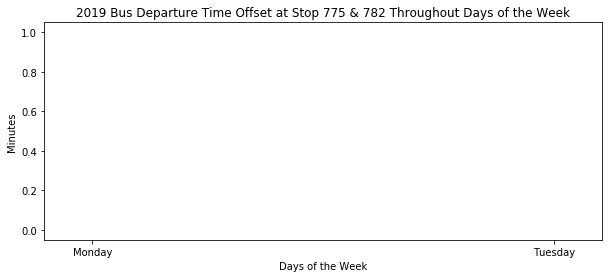

In [6]:
stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 775]
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
stopactual['Day of Week'] = pd.Categorical(stopactual['Day of Week'], categories=categories, ordered=True)
stopactual = stopactual.sort_values('Day of Week')






fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Departure Time Offset at Stop 775 & 782 Throughout Days of the Week", xlabel="Days of the Week", ylabel="Minutes")


plt.plot(stopactual['Day of Week'], stopactual['Difference (Minutes)'], label = 'Average Departure time offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 782]
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
stopactual['Day of Week'] = pd.Categorical(stopactual['Day of Week'], categories=categories, ordered=True)
stopactual = stopactual.sort_values('Day of Week')
plt.plot(stopactual['Day of Week'], stopactual['Difference (Minutes)'], label = 'Stop 782 Average Departure Time Offset')

plt.grid()
plt.legend()
plt.show()